### What are our  tweeting patterns say about us across New Zealand
##### Author: Herman Wandabwa
Github  https://github.com/wandabwa2004 ,Linkedln https://www.linkedin.com/in/wandabwaherman/

In [147]:
import GetOldTweets3 as got
import pandas as pd
import gensim
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
import seaborn as sb
import pyLDAvis
import pyLDAvis.gensim
import re 

C:\Users\wanda\.conda\envs\deepml37\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [57]:
#text_query = 'covid'
count = 10000
near = "Wellington, New Zealand"
within_ = "15mi"

# Creation of query object
tweetCriteria = got.manager.TweetCriteria().setMaxTweets(count)\
                                             .setNear(near)\
                                              .setWithin (within_)\
                                               .setSince ("2020-03-25")\
                                                .setUntil("2020-03-31")


# Creation of list that contains all tweets
tweets_wellington = got.manager.TweetManager.getTweets(tweetCriteria)
# Creating list of chosen tweet data
text_tweets_wellington = [[tweets_wellington.date, tweets_wellington.text] for tweets_wellington in tweets_wellington]

In [58]:
df_wellington = pd.DataFrame(text_tweets_wellington, columns =['Date', 'Text']) 


In [60]:
df_wellington.tail()

,Date,Text
9995,2020-03-29 18:54:29+00:00,The map that shows a major problem for the US
9996,2020-03-29 18:54:26+00:00,No this is Trump
9997,2020-03-29 18:53:43+00:00,Because they talk to themselves and too many p...
9998,2020-03-29 18:53:39+00:00,Lock Down Day 5: on my government approved tri...
9999,2020-03-29 18:53:38+00:00,"Patience, patience."


In [61]:
df_wellington.to_csv("Wellingtontweets.csv")

In [62]:
count = count = 10000
near = "Auckland, New Zealand"
within_ = "15mi"

# Creation of query object
tweetCriteria = got.manager.TweetCriteria().setMaxTweets(count)\
                                             .setNear(near)\
                                              .setWithin (within_)\
                                               .setSince ("2020-03-25")\
                                                .setUntil("2020-03-30")


# Creation of list that contains all tweets
tweets_auckland = got.manager.TweetManager.getTweets(tweetCriteria)
# Creating list of chosen tweet data
text_tweets_auckland = [[tweets_auckland.date, tweets_auckland.text] for tweets_auckland in tweets_auckland]

In [63]:
df_auckland  = pd.DataFrame(text_tweets_auckland, columns =['Date', 'Text']) 

In [64]:
df_auckland.to_csv("Auckland_tweets.csv")

In [68]:
df_wellington.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Date    10000 non-null datetime64[ns, UTC]
Text    10000 non-null object
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 156.3+ KB


In [245]:
df_wellington = pd.read_csv("Wellingtontweets.csv")
df_auckland = pd.read_csv("Auckland_tweets.csv")
df_wellington.drop_duplicates(inplace=True)
df_wellington = df_wellington[df_wellington['Text'].isnull() == False]
df_wellington.reset_index(inplace=True)
df_wellington.drop('index', axis=1, inplace=True)
df_wellington.drop('Unnamed: 0', axis=1, inplace=True)
print ('Dataset loaded with shape', df_wellington.shape  )  

#------------ Auckland tweets 
df_auckland.drop_duplicates(inplace=True)
df_auckland = df_auckland[df_auckland['Text'].notna()]   
#df_auckland = df_auckland[df_auckland['Text'].isnull() == False]
df_auckland.reset_index(inplace=True)
df_auckland.drop('index', axis=1, inplace=True)
df_auckland.drop('Unnamed: 0', axis=1, inplace=True)
print ('Dataset loaded with shape', df_auckland.shape  )  


Dataset loaded with shape (9715, 2)
Dataset loaded with shape (9744, 2)


### Some  EDA

In [246]:

def drawbarplot(x,y,xlabel,title,figsize=(10,10)):
    plt.figure(figsize=figsize)    
    sns.barplot(x=x,y=y,palette = 'terrain',orient='h',order=y)
    for i,v in enumerate(x):
        plt.text(0.8,i,v,color='k',fontsize=10)
    
    plt.title(title,fontsize=20)
    plt.xlabel(xlabel,fontsize =14)
    plt.show()

In [247]:
df_auckland.head()

,Date,Text
0,2020-03-29 23:59:58+00:00,"""I run a fitness center, I train soccer teams,..."
1,2020-03-29 23:59:51+00:00,
2,2020-03-29 23:59:50+00:00,What if Jesus is already here. Will you go to ...
3,2020-03-29 23:59:48+00:00,"End yourself and move on to the next life, cuz..."
4,2020-03-29 23:59:43+00:00,I'll DM you!


In [248]:
import datetime

#Converting datetime string to datetime
#df_wellington['Date'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S+00:00") for d in df_wellington['Date']]
df_auckland['Date'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S+00:00') for d in df_auckland['Date']]


In [249]:

df_wellington['Date'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S+00:00') for d in df_wellington['Date']]

In [250]:
df_wellington.head()

,Date,Text
0,2020-03-30 22:44:32,ESA SOS VOS? SI SOS VOS SOS HERMOSA Y LA RESPU...
1,2020-03-30 22:44:32,"Doing a bug bomb today! Not ideal, atleast its..."
2,2020-03-30 22:44:27,Neat! I thought they'd dropped that from the p...
3,2020-03-30 22:44:23,i mean it’s hypothetically not permanent but a...
4,2020-03-30 22:44:19,you heard me


In [251]:
df_wellington['Tweetingtime'] = [d.hour for d in df_wellington['Date']]

In [252]:
df_auckland['Tweetingtime'] = [d.hour for d in df_auckland['Date']]

In [255]:
df_auckland['Tweetingtime'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10],
      dtype=int64)

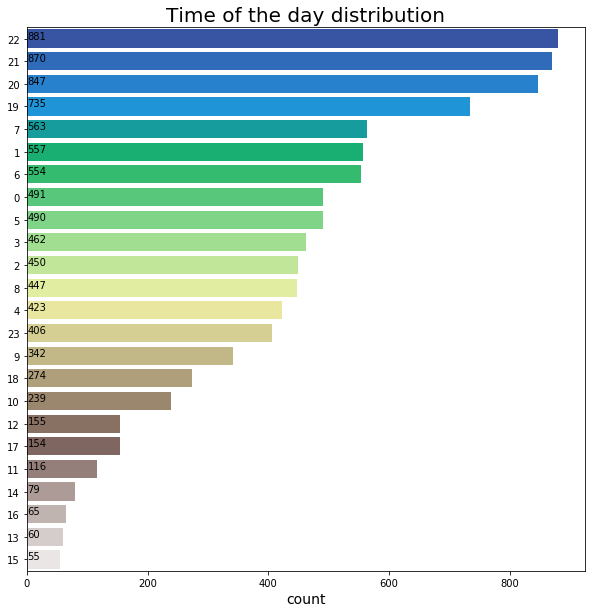

In [104]:
#Tweeting times in Wellington 

count_wellington =  df_wellington['Tweetingtime'].value_counts()
drawbarplot(x=count_wellington.values,y=count_wellington.index,xlabel='count',title='Time of the day distribution',figsize=(10,10))

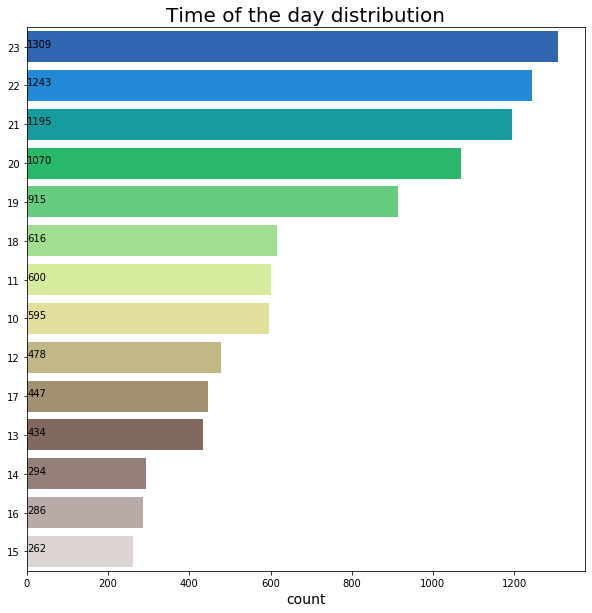

In [105]:
#TWeeting  times in Auckland
count_auckland =  df_auckland['Tweetingtime'].value_counts()
drawbarplot(x=count_auckland.values,y=count_auckland.index,xlabel='count',title='Time of the day distribution',figsize=(10,10))

In [107]:
### A little bit of data  clean up. First I'll get a copy of the original DFs above  
data_copy_wellington = df_wellington.copy() 
data_copy_auckland = df_auckland.copy()

In [109]:
#clean up Wellington data 
stop += [ 'KOT','kot', '<elong>','com','pic.twitter.com','twitter','rt','que','pic.twitter.com/dnfh8aa3vz','lol']

data_copy_wellington['Text'] = data_copy_wellington['Text'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x)))
#remove links or anything starting with http
data_copy_wellington['Text'] = data_copy_wellington['Text'].map(lambda x:re.sub('http.*','',str(x)))
#lower case everything 
data_copy_wellington['Text'] = data_copy_wellington['Text'].map(lambda x:re.sub(r'#','',str(x)))
data_copy_wellington['Text'] = data_copy_wellington['Text'].map(lambda x:re.sub(r'@\w*','',str(x)))
data_copy_wellington['Text'] = data_copy_wellington['Text'].map(lambda x:str(x).lower()) 
data_copy_wellington['Text'] = data_copy_wellington['Text'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) > 3))
data_copy_wellington['Text'] = data_copy_wellington['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Overall Chatter in Wellington 

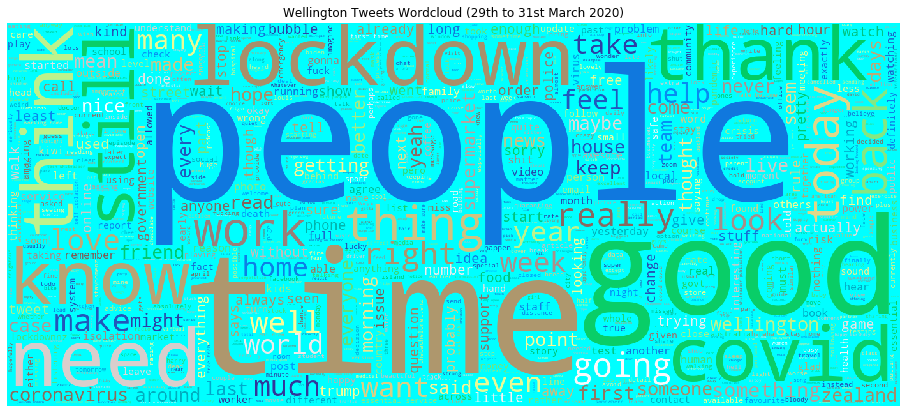

In [111]:

wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(data_copy_wellington['Text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Wellington Tweets Wordcloud (29th to 31st March 2020)')
plt.axis('off')
plt.show()

In [110]:
#clean up Auckland data. No harm in doing them separately 
stop += [ 'KOT','kot', '<elong>','com','pic.twitter.com','twitter','rt','que','pic.twitter.com/dnfh8aa3vz','lol']

data_copy_auckland['Text'] = data_copy_auckland['Text'].map(lambda x:re.sub('[^a-zA-Z]',' ',str(x)))
#remove links or anything starting with http
data_copy_auckland['Text'] = data_copy_auckland['Text'].map(lambda x:re.sub('http.*','',str(x)))
#lower case everything 
data_copy_auckland['Text'] = data_copy_auckland['Text'].map(lambda x:re.sub(r'#','',str(x)))
data_copy_auckland['Text'] = data_copy_auckland['Text'].map(lambda x:re.sub(r'@\w*','',str(x)))
data_copy_auckland['Text'] = data_copy_auckland['Text'].map(lambda x:str(x).lower()) 
data_copy_auckland['Text'] = data_copy_auckland['Text'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) > 3))
data_copy_auckland['Text'] = data_copy_auckland['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## Overall Chatter in Wellington 

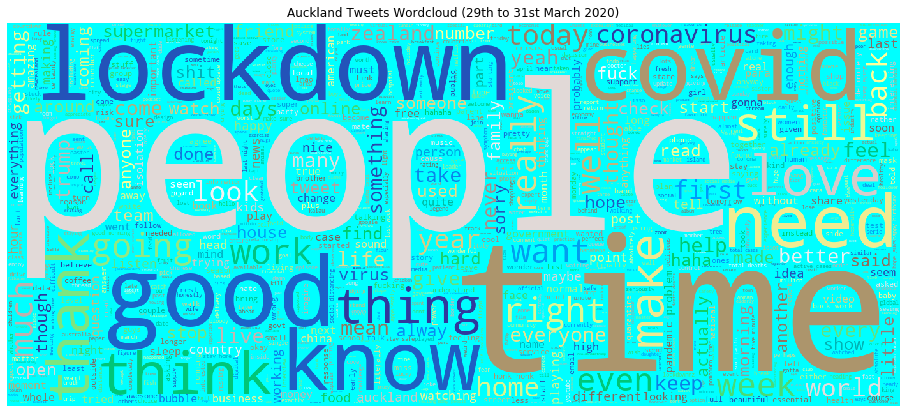

In [112]:
wc = WordCloud(height=600,repeat=False,width=1400,max_words=1000,stopwords=st_words,colormap='terrain',background_color='Cyan',mode='RGBA').generate(' '.join(data_copy_auckland['Text'].dropna().astype(str)))
plt.figure(figsize = (16,16))
plt.imshow(wc)
plt.title('Auckland Tweets Wordcloud (29th to 31st March 2020)')
plt.axis('off')
plt.show()

### Overall topics
#### Start with Tokenizing, then modelling topic for  Aucklanders and  those in Wellington

In [113]:
from nltk.tokenize import TweetTokenizer 
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from nltk.corpus import stopwords

tokenizer = TweetTokenizer()
def tokenize(tweet):
    try:
        
        tokens = tokenizer.tokenize(tweet)
        
        return tokens
    except:
        return 'NC'

### Tokenize Wellington tweets

In [115]:

def postprocess(data_copy_wellington):

    data_copy_wellington['Tokens'] = data_copy_wellington['Text'].progress_map(tokenize)  ## progress_map is a variant of the map function plus a progress bar. Handy to monitor DataFrame creations.
    data_copy_wellington = data_copy_wellington[data_copy_wellington.Tokens != 'NC']
    data_copy_wellington.reset_index(inplace=True)
    data_copy_wellington.drop('index', inplace=True, axis=1)
    return data_copy_wellington

data_copy_wellington = postprocess(data_copy_wellington)

progress-bar: 100%|█████████████████████████████████████████████████████████████| 9715/9715 [00:00<00:00, 46043.86it/s]


### Tokenize Auckland  tweets

In [204]:
#Will relook at tbe below error
def postprocess_auck(data_copy_auckland):

    data_copy_auckland['Tokens'] = data_copy_auckland['Text'].progress_map(tokenize)  ## progress_map is a variant of the map function plus a progress bar. Handy to monitor DataFrame creations.
    #data_copy_auckland.dropna(axis=1, how='all')
    data_copy_auckland = data_copy_auckland[data_copy_auckland.Tokens != 'NC']
    data_copy_auckland.reset_index(inplace=True)
    data_copy_auckland = data_copy_auckland[data_copy_auckland.astype(str)['Tokens'] != '[]']
    #data_copy_auckland[data_copy_auckland.astype(str)['Tokens'] != '[]']

    data_copy_auckland.drop('index', inplace=True, axis=1)
    return data_copy_auckland

data_copy_auckland = postprocess_auck(data_copy_auckland)

progress-bar: 100%|█████████████████████████████████████████████████████████████| 9744/9744 [00:00<00:00, 51537.19it/s]


In [205]:
data_copy_auckland.head()

,Date,Text,Tweetingtime,Tokens
0,2020-03-29 23:59:58,fitness center train soccer teams physical the...,23,"[fitness, center, train, soccer, teams, physic..."
2,2020-03-29 23:59:50,jesus already awakened,23,"[jesus, already, awakened]"
3,2020-03-29 23:59:48,move next life shit aint worth,23,"[move, next, life, shit, aint, worth]"
5,2020-03-29 23:59:34,motherspolish coming clutch restoring piece ma...,23,"[motherspolish, coming, clutch, restoring, pie..."
6,2020-03-29 23:59:34,heart appointment specialist zoom thursday,23,"[heart, appointment, specialist, zoom, thursday]"


### After 11PM

In [224]:
wellington_late  = data_copy_wellington[data_copy_wellington.Tweetingtime == 22]
auckland_late  = data_copy_auckland[data_copy_auckland.Tweetingtime == 23]

In [225]:
len(wellington_late)

881

In [226]:
len(auckland_late)

1178

In [223]:
data_copy_wellington.head()

,Date,Text,Tweetingtime,Tokens
0,2020-03-30 22:44:32,hermosa respuesta dios quien pudiera linda,22,"[hermosa, respuesta, dios, quien, pudiera, linda]"
1,2020-03-30 22:44:32,bomb today ideal atleast sunny could walk wait...,22,"[bomb, today, ideal, atleast, sunny, could, wa..."
2,2020-03-30 22:44:27,neat thought dropped privacy changes mean brea...,22,"[neat, thought, dropped, privacy, changes, mea..."
3,2020-03-30 22:44:23,mean hypothetically permanent also look back hair,22,"[mean, hypothetically, permanent, also, look, ..."
4,2020-03-30 22:44:19,heard,22,[heard]


## What is being discussed in Wellington  and Auckland

In [228]:
data_words_wellington = list(data_copy_wellington['Tokens'])
data_words_auckland = list(data_copy_auckland['Tokens'])

## Peak times 
data_words_wellington_late = list(wellington_late['Tokens'])
data_words_auckland_late = list(auckland_late['Tokens'])

In [208]:
data_words_auckland

[['fitness',
  'center',
  'train',
  'soccer',
  'teams',
  'physical',
  'therapist',
  'never',
  'smoked',
  'last',
  'fever',
  'years',
  'suddenly',
  'catapulted',
  'onto',
  'hospital',
  'unable',
  'breathe',
  'hard',
  'imagine',
  'time',
  'never',
  'passes',
  'intense',
  'never',
  'forget'],
 ['jesus', 'already', 'awakened'],
 ['move', 'next', 'life', 'shit', 'aint', 'worth'],
 ['motherspolish',
  'coming',
  'clutch',
  'restoring',
  'piece',
  'mackinind',
  'volk',
  'racing',
  'communityisolationthings',
  'whyiseverythingchrome'],
 ['heart', 'appointment', 'specialist', 'zoom', 'thursday'],
 ['remove', 'inactive', 'subs', 'youtube'],
 ['white', 'outside', 'brown', 'inside', 'around'],
 ['last', 'thing', 'wanted', 'feed'],
 ['nuts'],
 ['need', 'medicine', 'ball'],
 ['cornflour',
  'came',
  'close',
  'using',
  'custard',
  'powder',
  'mistake',
  'make',
  'boxes',
  'similar'],
 ['leaf'],
 ['wildflowers', 'khyber', 'pass', 'know', 'name', 'flower', 'ebod

In [229]:
##Bigrams model and TFIDF 

# Build the bigram and trigram models
bigram_wellington  = gensim.models.Phrases(data_words_wellington, min_count=2, threshold=100) # higher threshold fewer phrases.
bigram_auckland  = gensim.models.Phrases(data_words_auckland, min_count=2, threshold=100) # higher threshold fewer phrases.
bigram_wellington_late = gensim.models.Phrases(data_words_wellington_late, min_count=2, threshold=100)
bigram_auckland_late = gensim.models.Phrases(data_words_auckland_late, min_count=2, threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod_wellington = gensim.models.phrases.Phraser(bigram_wellington)
bigram_mod_auckland = gensim.models.phrases.Phraser(bigram_auckland)
bigram_mod_wellington_late = gensim.models.phrases.Phraser(bigram_wellington_late)
bigram_mod_auckland_late = gensim.models.phrases.Phraser(bigram_auckland_late)



In [230]:
dictionary_bi_wellington = gensim.corpora.Dictionary(bigram_mod_wellington[data_words_wellington])
dictionary_bi_auckland = gensim.corpora.Dictionary(bigram_mod_auckland[data_words_auckland])
#------------------
dictionary_bi_wellington_late = gensim.corpora.Dictionary(bigram_mod_wellington_late[data_words_wellington_late])
dictionary_bi_auckland_late = gensim.corpora.Dictionary(bigram_mod_auckland_late[data_words_auckland_late])


In [231]:
#Bigram corpus  for the two datasets

bi_corpus_wellington =  [dictionary_bi_wellington.doc2bow(doc) for doc in bigram_mod_wellington[data_words_wellington]]
bi_corpus_auckland  =  [dictionary_bi_auckland.doc2bow(doc) for doc in bigram_mod_auckland[data_words_auckland]]

#Late night corpus
bi_corpus_wellington_late =  [dictionary_bi_wellington_late.doc2bow(doc) for doc in bigram_mod_wellington_late[data_words_wellington_late]]
bi_corpus_auckland_late  =  [dictionary_bi_auckland_late.doc2bow(doc) for doc in bigram_mod_auckland_late[data_words_auckland_late]]


In [212]:
bi_corpus_auckland

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 3),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(24, 1), (25, 1), (26, 1)],
 [(27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1)],
 [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1)],
 [(48, 1), (49, 1), (50, 1), (51, 1)],
 [(52, 1), (53, 1), (54, 1), (55, 1), (56, 1)],
 [(10, 1), (57, 1), (58, 1), (59, 1)],
 [(60, 1)],
 [(61, 1), (62, 1), (63, 1)],
 [(64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1)],
 [(74, 1)],
 [(75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1)],
 [(82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)],
 [(92, 1), (93, 1), (94, 1), (9

In [213]:
#Sample  output  
count = 0
for k, v in dictionary_bi_auckland.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 breathe
1 catapulted
2 center
3 fever
4 fitness
5 forget
6 hard
7 hospital
8 imagine
9 intense
10 last


In [232]:
## What is being discussed in Auckland   
from gensim import corpora, models

tfidf_bi_wellington = models.TfidfModel(bi_corpus_wellington)
tfidf_bi_auckland = models.TfidfModel(bi_corpus_auckland)

tfidf_bi_wellington_late = models.TfidfModel(bi_corpus_wellington_late)
tfidf_bi_auckland_late = models.TfidfModel(bi_corpus_auckland_late)


In [233]:
#TFIDF Bi-gram Corpus 
corpus_tfidf_bi_wellington = tfidf_bi_wellington[bi_corpus_wellington]
corpus_tfidf_bi_auckland = tfidf_bi_auckland[bi_corpus_auckland]
#---------------------------------------------------

corpus_tfidf_bi_wellington_late = tfidf_bi_wellington_late[bi_corpus_wellington_late]
corpus_tfidf_bi_auckland_late = tfidf_bi_auckland_late[bi_corpus_auckland_late]

In [216]:
### Training model on bigrams and Bigrams TFIDF
#### Sample topics using Bigrams
lda_model_bigrams_wellington = gensim.models.LdaMulticore(corpus_tfidf_bi_wellington, num_topics=10, id2word=dictionary_bi_wellington, passes=2, workers=10) ##LDA model on unigrams
#lda_model_bigrams_auckland = gensim.models.LdaMulticore(bi_corpus_auckland, num_topics=10, id2word=bi_corpus_auckland, passes=2, workers=10)

In [218]:
lda_model_bigrams_auckland = gensim.models.LdaMulticore(corpus_tfidf_bi_auckland, num_topics=10, id2word=dictionary_bi_auckland, passes=2, workers=10)

In [234]:
lda_model_bigrams_wellington_late = gensim.models.LdaMulticore(corpus_tfidf_bi_wellington_late, num_topics=5, id2word=dictionary_bi_wellington_late, passes=2, workers=10)
lda_model_bigrams_auckland_late = gensim.models.LdaMulticore(corpus_tfidf_bi_auckland_late, num_topics=5, id2word=dictionary_bi_auckland_late, passes=2, workers=10)

## Sample topics 
#### Wellington


In [219]:
#sample topics Wellington 
for idx, topic in lda_model_bigrams_wellington.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.006*"good" + 0.004*"love" + 0.003*"time" + 0.003*"need" + 0.002*"said" + 0.002*"people" + 0.002*"gracias" + 0.002*"hear" + 0.002*"thought" + 0.002*"though"
Topic: 1 
Words: 0.003*"yeah" + 0.003*"know" + 0.002*"time" + 0.002*"well" + 0.002*"news" + 0.002*"home" + 0.002*"much" + 0.002*"maybe" + 0.002*"could" + 0.002*"true"
Topic: 2 
Words: 0.003*"good" + 0.002*"time" + 0.002*"people" + 0.002*"back" + 0.002*"like" + 0.002*"many" + 0.002*"never" + 0.002*"covid" + 0.002*"really" + 0.002*"lockdown"
Topic: 3 
Words: 0.003*"covid" + 0.003*"sure" + 0.003*"know" + 0.003*"would" + 0.003*"pretty" + 0.002*"sorry" + 0.002*"please" + 0.002*"done" + 0.002*"something" + 0.002*"lockdown"
Topic: 4 
Words: 0.003*"hahaha" + 0.003*"really" + 0.002*"like" + 0.002*"great" + 0.002*"people" + 0.002*"covid" + 0.002*"still" + 0.002*"lovely" + 0.002*"know" + 0.001*"good"
Topic: 5 
Words: 0.006*"thank" + 0.003*"nice" + 0.002*"good" + 0.002*"much" + 0.002*"enough" + 0.002*"need" + 0.002*"covid" + 

#### Wellington

In [220]:
#sample topics Auckland 
for idx, topic in lda_model_bigrams_auckland.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.004*"right" + 0.003*"done" + 0.002*"please" + 0.002*"love" + 0.002*"haha" + 0.002*"today" + 0.002*"time" + 0.002*"know" + 0.002*"happy" + 0.002*"like"
Topic: 1 
Words: 0.003*"like" + 0.002*"people" + 0.002*"mean" + 0.002*"today" + 0.002*"coronavirus" + 0.002*"much" + 0.002*"know" + 0.001*"amazing" + 0.001*"well" + 0.001*"need"
Topic: 2 
Words: 0.003*"sure" + 0.002*"people" + 0.002*"come" + 0.002*"like" + 0.002*"good" + 0.002*"thanks" + 0.002*"love" + 0.002*"live" + 0.002*"lockdown" + 0.002*"hope"
Topic: 3 
Words: 0.004*"thank" + 0.003*"good" + 0.003*"thanks" + 0.003*"morning" + 0.003*"like" + 0.002*"time" + 0.002*"know" + 0.002*"still" + 0.002*"lockdown" + 0.002*"never"
Topic: 4 
Words: 0.003*"think" + 0.002*"covid" + 0.002*"people" + 0.002*"like" + 0.002*"would" + 0.002*"know" + 0.002*"yeah" + 0.002*"need" + 0.002*"could" + 0.002*"lockdown"
Topic: 5 
Words: 0.003*"love" + 0.003*"good" + 0.003*"really" + 0.002*"fuck" + 0.002*"shit" + 0.002*"would" + 0.002*"virus" + 0

In [235]:
#sample topics Wellington Late
for idx, topic in lda_model_bigrams_wellington_late.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.003*"hahaha" + 0.002*"thing" + 0.002*"love" + 0.002*"getting" + 0.002*"like" + 0.002*"helped" + 0.002*"read" + 0.002*"going" + 0.002*"things" + 0.002*"always"
Topic: 1 
Words: 0.003*"good" + 0.003*"thanks" + 0.003*"people" + 0.002*"great" + 0.002*"would" + 0.002*"like" + 0.002*"pero" + 0.002*"real" + 0.002*"think" + 0.002*"done"
Topic: 2 
Words: 0.004*"gracias" + 0.003*"know" + 0.003*"gracias_hermosa" + 0.002*"need" + 0.002*"week" + 0.002*"still" + 0.002*"great" + 0.002*"good" + 0.002*"time" + 0.002*"much"
Topic: 3 
Words: 0.003*"really" + 0.003*"like" + 0.003*"time" + 0.002*"today" + 0.002*"good" + 0.002*"want" + 0.002*"well" + 0.002*"would" + 0.002*"people" + 0.002*"years"
Topic: 4 
Words: 0.003*"covid" + 0.002*"lockdown" + 0.002*"well" + 0.002*"also" + 0.002*"able" + 0.002*"fined" + 0.002*"please" + 0.002*"coronavirus" + 0.002*"bien" + 0.002*"ducklings"


In [236]:
#sample topics Wellington Late
for idx, topic in lda_model_bigrams_auckland_late.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.003*"time" + 0.002*"share" + 0.002*"going" + 0.002*"even" + 0.002*"lunch" + 0.002*"best" + 0.002*"make" + 0.002*"would" + 0.002*"thing" + 0.002*"home"
Topic: 1 
Words: 0.003*"like" + 0.002*"newprofilepic" + 0.002*"anyone" + 0.002*"always" + 0.002*"thank" + 0.002*"tell" + 0.002*"else" + 0.002*"people" + 0.002*"talent" + 0.002*"things"
Topic: 2 
Words: 0.003*"thank" + 0.003*"sorry" + 0.003*"people" + 0.002*"straight" + 0.002*"good" + 0.002*"could" + 0.002*"well" + 0.002*"week" + 0.002*"know" + 0.002*"much"
Topic: 3 
Words: 0.005*"love" + 0.003*"right" + 0.003*"also" + 0.003*"thanks" + 0.002*"like" + 0.002*"cool" + 0.002*"indeed" + 0.002*"make" + 0.002*"facts" + 0.002*"mood"
Topic: 4 
Words: 0.003*"need" + 0.002*"good" + 0.002*"legend" + 0.002*"want" + 0.002*"haha" + 0.002*"really" + 0.002*"lockdown" + 0.002*"time" + 0.002*"picture" + 0.002*"send"


### Visualizations  
#### Wellington 

In [221]:
pyLDAvis.enable_notebook()

visualization_wellington = pyLDAvis.gensim.prepare(lda_model_bigrams_wellington, corpus_tfidf_bi_wellington, dictionary_bi_wellington, mds='mmds')
visualization_wellington



C:\Users\wanda\.conda\envs\deepml37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.004926  0.016464       1        1  11.342155
7      0.010054 -0.087069       2        1  10.824913
6     -0.071896 -0.026146       3        1  10.748382
2     -0.047884  0.081843       4        1  10.614675
3      0.081488 -0.065123       5        1  10.450824
1      0.071505 -0.013207       6        1   9.558431
0      0.020614  0.093118       7        1   9.247804
5     -0.057122 -0.083814       8        1   9.222691
4     -0.093909  0.027779       9        1   9.097527
9      0.082224  0.056156      10        1   8.892599, topic_info=      Category       Freq               Term      Total  loglift  logprob
1260   Default  26.000000              thank  26.000000  30.0000  30.0000
141    Default  30.000000               love  30.000000  29.0000  29.0000
62     Default   8.000000             hahaha   8.000000  28.0000  28.0000
165    Default  37.000000             thanks  37.000000  27.0000  27.0000
213    Default  47.000000               good  47.000000  26.0000  26.0000
743    Default  10.000000              happy  10.000000  25.0000  25.0000
151    Default  19.000000               nice  19.000000  24.0000  24.0000
368    Default   8.000000            gracias   8.000000  23.0000  23.0000
2268   Default   9.000000               cute   9.000000  22.0000  22.0000
50     Default  17.000000               sure  17.000000  21.0000  21.0000
827    Default  13.000000              sorry  13.000000  20.0000  20.0000
10800  Default   5.000000             nombre   5.000000  19.0000  19.0000
2141   Default   4.000000             cherry   4.000000  18.0000  18.0000
657    Default  14.000000               said  14.000000  17.0000  17.0000
2267   Default   5.000000               mood   5.000000  16.0000  16.0000
2288   Default   8.000000            problem   8.000000  15.0000  15.0000
111    Default  20.000000               yeah  20.000000  14.0000  14.0000
670    Default  12.000000               live  12.000000  13.0000  13.0000
524    Default  22.000000             please  22.000000  12.0000  12.0000
4622   Default   3.000000              block   3.000000  11.0000  11.0000
1647   Default  10.000000               fuck  10.000000  10.0000  10.0000
42     Default  15.000000             pretty  15.000000   9.0000   9.0000
1013   Default   9.000000               true   9.000000   8.0000   8.0000
6589   Default   2.000000               amen   2.000000   7.0000   7.0000
1492   Default   7.000000             coffee   7.000000   6.0000   6.0000
450    Default   5.000000              april   5.000000   5.0000   5.0000
728    Default  14.000000               done  14.000000   4.0000   4.0000
231    Default  10.000000               hear  10.000000   3.0000   3.0000
19     Default  34.000000               know  34.000000   2.0000   2.0000
24     Default  17.000000            thought  17.000000   1.0000   1.0000
...        ...        ...                ...        ...      ...      ...
8612   Topic10   1.012927              lindo   2.298689   1.6005  -7.5567
2590   Topic10   1.824133  essential_service   5.414078   1.3321  -6.9684
566    Topic10   3.920433               hope  19.278913   0.8271  -6.2033
1647   Topic10   2.726480               fuck  10.953241   1.0293  -6.5665
1572   Topic10   1.703078              media   5.209595   1.3019  -7.0371
898    Topic10   2.128317              photo   7.680763   1.1366  -6.8142
286    Topic10   2.275664               glad   8.658813   1.0836  -6.7473
53     Topic10   2.838777              years  13.923479   0.8297  -6.5262
165    Topic10   4.786850             thanks  37.923019   0.3503  -6.0037
2631   Topic10   2.244256          isolation  10.046235   0.9211  -6.7612
243    Topic10   1.586659              asked   5.533474   1.1708  -7.1079
19     Topic10   3.588238               know  34.967602   0.1432  -6.2919
86     Topic10   3.757397             people  41.9529

In [239]:
pyLDAvis.save_html(visualization_wellington, 'visualization_wellington.html') #Save visualization 

## Wellington Late 

In [237]:
pyLDAvis.enable_notebook()

visualization_wellington_late = pyLDAvis.gensim.prepare(lda_model_bigrams_wellington_late, corpus_tfidf_bi_wellington_late, dictionary_bi_wellington_late, mds='mmds')
visualization_wellington_late

C:\Users\wanda\.conda\envs\deepml37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.031344  0.039207       1        1  20.717848
3     -0.002805 -0.050515       2        1  20.534492
0     -0.050754 -0.013669       3        1  20.172956
1     -0.026261  0.044476       4        1  19.432886
4      0.048477 -0.019499       5        1  19.141813, topic_info=     Category      Freq             Term     Total  loglift  logprob
371   Default  2.000000          gracias  2.000000  30.0000  30.0000
581   Default  1.000000  gracias_hermosa  1.000000  29.0000  29.0000
61    Default  1.000000           hahaha  1.000000  28.0000  28.0000
77    Default  2.000000           really  2.000000  27.0000  27.0000
166   Default  2.000000           thanks  2.000000  26.0000  26.0000
450   Default  1.000000             week  1.000000  25.0000  25.0000
343   Default  1.000000             pero  1.000000  24.0000  24.0000
353   Default  1.000000             wait  1.000000  23.0000  23.0000
435   Default  1.000000           helped  1.000000  22.0000  22.0000
827   Default  1.000000          exactly  1.000000  21.0000  21.0000
163   Default  1.000000            bored  1.000000  20.0000  20.0000
214   Default  3.000000             good  3.000000  19.0000  19.0000
463   Default  0.000000        stay_home  0.000000  18.0000  18.0000
18    Default  1.000000            fined  1.000000  17.0000  17.0000
392   Default  0.000000             felt  0.000000  16.0000  16.0000
872   Default  1.000000             able  1.000000  15.0000  15.0000
764   Default  0.000000             bien  0.000000  14.0000  14.0000
369   Default  0.000000        ducklings  0.000000  13.0000  13.0000
74    Default  2.000000            great  2.000000  12.0000  12.0000
126   Default  1.000000          support  1.000000  11.0000  11.0000
131   Default  2.000000            covid  2.000000  10.0000  10.0000
1641  Default  1.000000             roll  1.000000   9.0000   9.0000
831   Default  1.000000            sorry  1.000000   8.0000   8.0000
2524  Default  1.000000             okay  1.000000   7.0000   7.0000
42    Default  1.000000      pretty_sure  1.000000   6.0000   6.0000
141   Default  1.000000             love  1.000000   5.0000   5.0000
669   Default  1.000000             real  1.000000   4.0000   4.0000
838   Default  0.000000             lock  0.000000   3.0000   3.0000
804   Default  1.000000         possible  1.000000   2.0000   2.0000
1367  Default  1.000000   self_isolation  1.000000   1.0000   1.0000
...       ...       ...              ...       ...      ...      ...
2045   Topic5  0.364907       california  0.678419   1.0332  -6.9927
363    Topic5  0.380182           groups  0.707361   1.0324  -6.9517
681    Topic5  0.360524            lived  0.673161   1.0289  -7.0047
1743   Topic5  0.356145         somebody  0.668953   1.0229  -7.0170
1340   Topic5  0.497246             baby  0.934722   1.0221  -6.6832
2920   Topic5  0.355163          quietly  0.668936   1.0202  -7.0197
1451   Topic5  0.449348            often  0.849867   1.0160  -6.7845
469    Topic5  0.489054            cause  0.954427   0.9847  -6.6998
131    Topic5  1.175974            covid  2.621649   0.8516  -5.8224
72     Topic5  0.563398         everyone  1.156818   0.9339  -6.5583
1580   Topic5  0.505902            media  1.015795   0.9562  -6.6660
163    Topic5  0.605811            bored  1.343980   0.8565  -6.4857
36     Topic5  0.535365             data  1.137736   0.8994  -6.6094
84     Topic5  0.632901      coronavirus  1.481418   0.8029  -6.4420
81     Topic5  0.860666             well  2.627073   0.5374  -6.1346
529    Topic5  0.658559           please  1.777869   0.6602  -6.4022
278    Topic5  0.864146         lockdown  3.142217   0.3624  -6.1306
25     Topic5  0.755979             also  2.520414   0.4491  -6.2643
864    Topic5  0.569326           though  1.489789   0.6914  -6.5478
227    Topic5  0.513738          zealand  1.371363   0.6714 

In [240]:
pyLDAvis.save_html(visualization_wellington_late, 'visualization_wellington_latehours.html') #Save visualization 

#### Auckland 


In [222]:
pyLDAvis.enable_notebook()

visualization_auckland = pyLDAvis.gensim.prepare(lda_model_bigrams_auckland, corpus_tfidf_bi_auckland, dictionary_bi_auckland, mds='mmds')
visualization_auckland

C:\Users\wanda\.conda\envs\deepml37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.044323  0.085076       1        1  10.994227
8      0.035854 -0.092118       2        1  10.661797
4      0.042127  0.095553       3        1  10.409809
1     -0.055807 -0.081003       4        1  10.237856
0     -0.075109  0.034633       5        1  10.233009
2      0.031846  0.050100       6        1   9.762118
6      0.097151 -0.030493       7        1   9.598354
5     -0.089198 -0.023676       8        1   9.571748
7      0.065296  0.001796       9        1   9.402770
9     -0.007838 -0.039867      10        1   9.128311, topic_info=      Category       Freq             Term      Total  loglift  logprob
130    Default  36.000000             good  36.000000  30.0000  30.0000
2137   Default   8.000000             cute   8.000000  29.0000  29.0000
417    Default  22.000000            right  22.000000  28.0000  28.0000
1170   Default  19.000000            thank  19.000000  27.0000  27.0000
209    Default  12.000000             done  12.000000  26.0000  26.0000
203    Default  15.000000             best  15.000000  25.0000  25.0000
1512   Default   5.000000         thoughts   5.000000  24.0000  24.0000
1311   Default  11.000000             fuck  11.000000  23.0000  23.0000
733    Default  13.000000             sure  13.000000  22.0000  22.0000
188    Default  10.000000             mean  10.000000  21.0000  21.0000
860    Default   4.000000    newprofilepic   4.000000  20.0000  20.0000
590    Default   4.000000  realdonaldtrump   4.000000  19.0000  19.0000
1260   Default   7.000000           monday   7.000000  18.0000  18.0000
4035   Default   5.000000   happy_birthday   5.000000  17.0000  17.0000
774    Default   4.000000             mood   4.000000  16.0000  16.0000
2266   Default   7.000000          awesome   7.000000  15.0000  15.0000
208    Default  12.000000             come  12.000000  14.0000  14.0000
10156  Default   3.000000     active_cases   3.000000  13.0000  13.0000
211    Default  18.000000           really  18.000000  12.0000  12.0000
106    Default  31.000000             love  31.000000  11.0000  11.0000
1259   Default   5.000000           legend   5.000000  10.0000  10.0000
1192   Default   9.000000          amazing   9.000000   9.0000   9.0000
661    Default   7.000000             cool   7.000000   8.0000   8.0000
991    Default  20.000000           thanks  20.000000   7.0000   7.0000
778    Default  11.000000             haha  11.000000   6.0000   6.0000
3349   Default   7.000000        beautiful   7.000000   5.0000   5.0000
656    Default  10.000000            virus  10.000000   4.0000   4.0000
2218   Default   7.000000             okay   7.000000   3.0000   3.0000
472    Default   7.000000          exactly   7.000000   2.0000   2.0000
1881   Default   2.000000           talent   2.000000   1.0000   1.0000
...        ...        ...              ...        ...      ...      ...
191    Topic10   4.301577             well  21.448692   0.7871  -6.0203
748    Topic10   1.150364             hold   2.877265   1.4770  -7.3392
24     Topic10   2.598505          already  10.521232   0.9953  -6.5243
641    Topic10   1.814602        yesterday   6.103818   1.1807  -6.8834
1073   Topic10   1.373528           thread   3.965139   1.3336  -7.1619
441    Topic10   3.029842            great  17.796738   0.6233  -6.3708
1462   Topic10   1.843626             must   7.326849   1.0140  -6.8675
513    Topic10   2.174625            sorry  10.573233   0.8123  -6.7024
965    Topic10   1.268877           system   3.679563   1.3291  -7.2411
130    Topic10   3.639133             good  36.191658   0.0967  -6.1875
109    Topic10   2.874190            covid  25.797083   0.1993  -6.4235
220    Topic10   2.988288         lockdown  29.460932   0.1054  -6.3846
397    Topic10   2.476124            going  18.742168   0.3697  -6.5726
663    Topic10   1.873272          another   9.683981   0.7510  -6.85

In [241]:
pyLDAvis.save_html(visualization_auckland, 'visualization_auckland.html') #Save visualization 

In [238]:
pyLDAvis.enable_notebook()

visualization_auckland_late = pyLDAvis.gensim.prepare(lda_model_bigrams_auckland_late, corpus_tfidf_bi_auckland_late, dictionary_bi_auckland_late, mds='mmds')
visualization_auckland_late

C:\Users\wanda\.conda\envs\deepml37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.040287 -0.041245       1        1  21.690765
3     -0.006487  0.052609       2        1  20.158323
2     -0.028531 -0.048209       3        1  19.828234
4     -0.053318  0.013429       4        1  19.489231
1      0.048049  0.023416       5        1  18.833443, topic_info=     Category      Freq           Term     Total  loglift  logprob
106   Default  4.000000           love  4.000000  30.0000  30.0000
866   Default  1.000000  newprofilepic  1.000000  29.0000  29.0000
627   Default  2.000000           also  2.000000  28.0000  28.0000
112   Default  1.000000       straight  1.000000  27.0000  27.0000
942   Default  1.000000          lunch  1.000000  26.0000  26.0000
1264  Default  2.000000         legend  2.000000  25.0000  25.0000
515   Default  2.000000          sorry  2.000000  24.0000  24.0000
450   Default  2.000000          share  2.000000  23.0000  23.0000
420   Default  3.000000          right  3.000000  22.0000  22.0000
139   Default  1.000000         anyone  1.000000  21.0000  21.0000
429   Default  2.000000           want  2.000000  20.0000  20.0000
500   Default  2.000000           even  2.000000  19.0000  19.0000
138   Default  1.000000           week  1.000000  18.0000  18.0000
63    Default  3.000000           need  3.000000  17.0000  17.0000
308   Default  2.000000          could  2.000000  16.0000  16.0000
191   Default  2.000000           well  2.000000  15.0000  15.0000
1881  Default  1.000000         talent  1.000000  14.0000  14.0000
268   Default  1.000000        picture  1.000000  13.0000  13.0000
995   Default  3.000000         thanks  3.000000  12.0000  12.0000
1343  Default  1.000000         indeed  1.000000  11.0000  11.0000
779   Default  1.000000           mood  1.000000  10.0000  10.0000
1552  Default  1.000000           yass  1.000000   9.0000   9.0000
1175  Default  3.000000          thank  3.000000   8.0000   8.0000
2138  Default  1.000000           cute  1.000000   7.0000   7.0000
664   Default  2.000000           cool  2.000000   6.0000   6.0000
69    Default  2.000000           make  2.000000   5.0000   5.0000
2076  Default  1.000000           give  1.000000   4.0000   4.0000
994   Default  2.000000           send  2.000000   3.0000   3.0000
203   Default  2.000000           best  2.000000   2.0000   2.0000
646   Default  2.000000          facts  2.000000   1.0000   1.0000
...       ...       ...            ...       ...      ...      ...
511    Topic5  0.440932           pode  0.767968   1.1147  -7.0661
3102   Topic5  0.439896         encase  0.768567   1.1115  -7.0684
3998   Topic5  0.439187      cacodemon  0.768579   1.1099  -7.0700
508    Topic5  0.571253           essa  1.010108   1.0996  -6.8071
2395   Topic5  0.424598          punch  0.753157   1.0964  -7.1038
460    Topic5  0.875200           else  1.557990   1.0928  -6.3805
557    Topic5  0.911617           tell  1.726621   1.0308  -6.3397
338    Topic5  1.771040           like  5.101714   0.6115  -5.6756
127    Topic5  1.046306         always  2.498937   0.7989  -6.2019
451    Topic5  0.813449         things  1.804371   0.8729  -6.4537
584    Topic5  0.760639        zealand  1.992918   0.7063  -6.5208
446    Topic5  0.628117           look  1.544332   0.7699  -6.7122
1175   Topic5  0.927518          thank  3.829876   0.2515  -6.3225
2562   Topic5  0.556984         living  1.189570   0.9107  -6.8324
838    Topic5  0.797880          think  2.920348   0.3720  -6.4730
208    Topic5  0.539767         social  1.120341   0.9393  -6.8638
1494   Topic5  0.615173        periodt  1.584667   0.7233  -6.7331
209    Topic5  0.674112           come  2.047223   0.5587  -6.6416
405    Topic5  0.579019           said  1.404375   0.7835  -6.7936
196    Topic5  0.874051         people  4.504156   0.0299  -6.3818
221    Topic5  0.805367       lockdown  3.706513   0.1430  -6.4637
1117   Topic5  0.581029     

In [242]:
pyLDAvis.save_html(visualization_auckland_late, 'visualization_auckland_late.html') #Save visualization 